CTT - initial data prep
* read in pickle
* split into chapters
* run several functions to chunk the text
* all in dataframes this time compared to lists in tex_prep_v02

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import textacy
import re

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
import pickle

In [3]:
book_dict = {'The Elephant Vanishes': 'ev_birnbaum_rubin_v01', 
             'Norwegian Wood 1': 'nw_birnbaum_v01', 
             'Norwegian Wood 2': 'nw_rubin_v01',
             'Wild Sheep Chase': 'wsc_birnbaum_v01', 
             'Wind Up Bird Chronicle': 'wubc_all_rubin_v01', 
             'Sputnik Sweetheart': 'ss_gabriel_v01',
             'Kafka on the Shore': 'kots_gabriel_v01',
             'Dance Dance Dance': 'ddd_birnbaum_v01',
             'Colorless Tsukuru Tazaki': 'ctt_gabriel_v01'}

In [4]:
books = pd.DataFrame.from_dict(book_dict, orient='index').reset_index()
books.columns = ['Title', 'Pickle']
books

,Title,Pickle
0,The Elephant Vanishes,ev_birnbaum_rubin_v01
1,Norwegian Wood 1,nw_birnbaum_v01
2,Norwegian Wood 2,nw_rubin_v01
3,Wild Sheep Chase,wsc_birnbaum_v01
4,Wind Up Bird Chronicle,wubc_all_rubin_v01
5,Sputnik Sweetheart,ss_gabriel_v01
6,Kafka on the Shore,kots_gabriel_v01
7,Dance Dance Dance,ddd_birnbaum_v01
8,Colorless Tsukuru Tazaki,ctt_gabriel_v01


In [5]:
def load_pickle(filename):
    in_path = '../../../../Documents/murakami/pkl/' + filename + '.pkl'
    with open (in_path, 'rb') as fp:
        return pickle.load(fp)

In [6]:
books['full_text'] = books['Pickle'].apply(load_pickle)

In [7]:
books

,Title,Pickle,full_text
0,The Elephant Vanishes,ev_birnbaum_rubin_v01,I’M IN THE kitchen cooking spaghetti when the ...
1,Norwegian Wood 1,nw_birnbaum_v01,C H II P T E R 6 (rontinutd) The scene at dinn...
2,Norwegian Wood 2,nw_rubin_v01,[Haruki Murakami Norwegian Wood This book was ...
3,Wild Sheep Chase,wsc_birnbaum_v01,"[\n , \n \n \n , Contents \n Cover \n About th..."
4,Wind Up Bird Chronicle,wubc_all_rubin_v01,[1 \n Tuesday’s Wind-up Bird \n ♦ \n Six Finge...
5,Sputnik Sweetheart,ss_gabriel_v01,[Haruki Murakami None This book was produced i...
6,Kafka on the Shore,kots_gabriel_v01,[Kafka on the Shore \n Haruki Murakami \n \n \...
7,Dance Dance Dance,ddd_birnbaum_v01,"[\n , \n \n \n , Contents \n Cover \n About th..."
8,Colorless Tsukuru Tazaki,ctt_gabriel_v01,"[\n , \n \n \n , Contents \n Cover \n About th..."


In [10]:
# books.iloc[0,2]

In [8]:
ctt = books['full_text'].iloc[8]

In [9]:
# wsc is read from an epub and is a list of texts
len(ctt)

31

In [15]:
ctt[25]

'19 \n SHINJUKU STATION IS  enormous.  Every day nearly 3.5 million people pass through it, so many that the  Guinness Book of World Records  officially lists JR Shinjuku Station as the station with the ‘Most Passengers in the World.’  A number of railroad lines cross there, the main ones being the Chuo line, Sobu line, Yamanote line, Saikyo line, Shonan–Shinjuku line, and the Narita Express.  The rails intersect and combine in complex and convoluted ways.  There are sixteen platforms in total.  In addition, there are two private rail lines, the Odakyu line and the Keio line, and three subway lines plugged in, as it were, from the side.  It is a total maze.  During rush hour, that maze transforms into a sea of humanity, a sea that foams up, rages, and roars as it surges toward the entrances and exits.  Streams of people changing trains become entangled, giving rise to dangerous, swirling whirlpools.  No prophet, no matter how righteous, could part that fierce, turbulent sea. \n It’s ha

In [18]:
pattern = re.compile(r'([\d]+) \n ([\w\W]+)')
re.findall(pattern, ctt[8])

[('2',
  'THIS DRASTIC CHANGE  took place during summer vacation of his sophomore year, between the first and second semesters.  Afterward, Tsukuru Tazaki’s life was changed forever, as if a sheer ridge had divided the original vegetation into two distinct biomes. \n As always, when vacation rolled around he packed his belongings (though he did not have very many to begin with) and rode the bullet train back home.  After a short visit with his family in Nagoya, he called up his four friends, but he couldn’t get in touch with any of them.  All four of them were out, he was told.  He figured they must have gone out together somewhere.  He left a message with each of their families, went downtown to a movie theater in the shopping district, and killed time watching a movie he didn’t particularly want to see.  Back at home, he ate dinner with his family, then phoned each of his friends again.  No one had returned. \n The next morning he called them again, with the same result: they were al

In [36]:
texts = ctt[7:26]

In [38]:
# regex pattern to extract chapter number, title and main text from a complete chapter
pattern = re.compile(r'([\d]+) \n ([\w\W]+)')

ch_nos = []
ch_titles = []
ch_texts = []
ireg_ch = []

for t in range(0,len(texts)):
#     print(t)
    out = re.findall(pattern, texts[t])
    if len(out) > 0:
        ch_nos.append(out[0][0])
        ch_titles.append(out[0][0])
        ch_texts.append(out[0][1])
    else:
        ch_nos.append(None)
        ch_titles.append(None)
        ch_texts.append(None)



In [39]:
chapters = pd.DataFrame({'number': ch_nos, 'title': ch_titles, 'text': ch_texts})
chapters.head()

,number,title,text
0,1,1,FROM JULY OF his sophomore year in college un...
1,2,2,THIS DRASTIC CHANGE took place during summer ...
2,3,3,IN THE HALF year when he wandered on the verg...
3,4,4,HE MET THE man at the college pool. \n Like T...
4,5,5,"‘ WHEN MY FATHER was young, he spent a year w..."


In [40]:
# function to find indices of full stops in a text
def fs_indexer(x):
    return [i for i, char in enumerate(x) if char == "."]

In [41]:
chapters['fstop_indices'] = chapters['text'].apply(lambda x: fs_indexer(x))

In [42]:
chapters.head()

,number,title,text,fstop_indices
0,1,1,FROM JULY OF his sophomore year in college un...,"[119, 219, 340, 450, 591, 625, 806, 871, 933, ..."
1,2,2,THIS DRASTIC CHANGE took place during summer ...,"[116, 253, 405, 531, 572, 628, 804, 889, 911, ..."
2,3,3,IN THE HALF year when he wandered on the verg...,"[85, 132, 222, 290, 352, 416, 481, 574, 606, 7..."
3,4,4,HE MET THE man at the college pool. \n Like T...,"[35, 96, 178, 276, 355, 512, 600, 639, 675, 70..."
4,5,5,"‘ WHEN MY FATHER was young, he spent a year w...","[81, 206, 362, 435, 581, 677, 818, 902, 944, 1..."


In [43]:
# function to find indices of full stops in a text
def split_indexer(text, n=1000):
    fstop_indices = fs_indexer(text)
    split_indices = []
    for j in range(n, len(text), n):
        i = 0
# keep going through the indices while less than the 1000 step
        while fstop_indices[i] < j:
            i += 1
# append list with the index of the full stop before the 1000 step
        split_indices.append(fstop_indices[i-1])
    return split_indices

In [44]:
chapters['split_indices'] = chapters['text'].apply(lambda x: split_indexer(x))

In [45]:
chapters.head()

,number,title,text,fstop_indices,split_indices
0,1,1,FROM JULY OF his sophomore year in college un...,"[119, 219, 340, 450, 591, 625, 806, 871, 933, ...","[996, 1983, 2948, 3943, 4964, 5996, 6975, 7944..."
1,2,2,THIS DRASTIC CHANGE took place during summer ...,"[116, 253, 405, 531, 572, 628, 804, 889, 911, ...","[999, 1845, 2998, 3925, 4956, 5982, 6995, 7914..."
2,3,3,IN THE HALF year when he wandered on the verg...,"[85, 132, 222, 290, 352, 416, 481, 574, 606, 7...","[956, 1909, 2907, 3960, 4999, 5910, 6979, 7934..."
3,4,4,HE MET THE man at the college pool. \n Like T...,"[35, 96, 178, 276, 355, 512, 600, 639, 675, 70...","[988, 1998, 2952, 3984, 4989, 5960, 6956, 7886..."
4,5,5,"‘ WHEN MY FATHER was young, he spent a year w...","[81, 206, 362, 435, 581, 677, 818, 902, 944, 1...","[944, 1991, 2976, 3844, 4986, 5979, 6962, 7969..."


In [46]:
# function to chunk a text
def text_chunker(text):
    split_indices = split_indexer(text)
    chunks = []
    for i, idx in enumerate(split_indices):
# if first split then start at index 0 and keep up to the full stop index (including the full stop)
        if i == 0:
            chunks.append(text[0:idx+1])
# else start from the end of the previous chunk after the full stop until the next
        else:
            chunks.append(text[split_indices[i-1]+2:idx+1])
    return chunks

In [47]:
chapters['chunks'] = chapters['text'].apply(lambda x: text_chunker(x))

In [48]:
chapters.head()

,number,title,text,fstop_indices,split_indices,chunks
0,1,1,FROM JULY OF his sophomore year in college un...,"[119, 219, 340, 450, 591, 625, 806, 871, 933, ...","[996, 1983, 2948, 3943, 4964, 5996, 6975, 7944...",[FROM JULY OF his sophomore year in college u...
1,2,2,THIS DRASTIC CHANGE took place during summer ...,"[116, 253, 405, 531, 572, 628, 804, 889, 911, ...","[999, 1845, 2998, 3925, 4956, 5982, 6995, 7914...",[THIS DRASTIC CHANGE took place during summer...
2,3,3,IN THE HALF year when he wandered on the verg...,"[85, 132, 222, 290, 352, 416, 481, 574, 606, 7...","[956, 1909, 2907, 3960, 4999, 5910, 6979, 7934...",[IN THE HALF year when he wandered on the ver...
3,4,4,HE MET THE man at the college pool. \n Like T...,"[35, 96, 178, 276, 355, 512, 600, 639, 675, 70...","[988, 1998, 2952, 3984, 4989, 5960, 6956, 7886...",[HE MET THE man at the college pool. \n Like ...
4,5,5,"‘ WHEN MY FATHER was young, he spent a year w...","[81, 206, 362, 435, 581, 677, 818, 902, 944, 1...","[944, 1991, 2976, 3844, 4986, 5979, 6962, 7969...","[‘ WHEN MY FATHER was young, he spent a year ..."


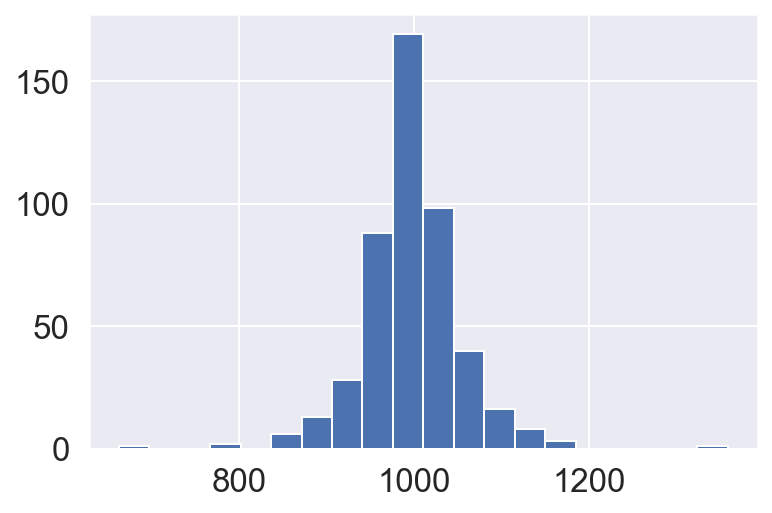

In [49]:
lengths = []
for chapter in chapters['chunks']:
    for chunk in chapter:
        lengths.append(len(chunk))
plt.hist(lengths, bins=20);

In [50]:
len(lengths)

473

In [54]:
chapters['translator'] = 'Philip Gabriel'

In [55]:
chapters['book_title'] = 'Colorless Tsukuru Tazaki'

In [56]:
chapters.head()

,number,title,text,fstop_indices,split_indices,chunks,translator,book_title
0,1,1,FROM JULY OF his sophomore year in college un...,"[119, 219, 340, 450, 591, 625, 806, 871, 933, ...","[996, 1983, 2948, 3943, 4964, 5996, 6975, 7944...",[FROM JULY OF his sophomore year in college u...,Philip Gabriel,Colorless Tsukuru Tazaki
1,2,2,THIS DRASTIC CHANGE took place during summer ...,"[116, 253, 405, 531, 572, 628, 804, 889, 911, ...","[999, 1845, 2998, 3925, 4956, 5982, 6995, 7914...",[THIS DRASTIC CHANGE took place during summer...,Philip Gabriel,Colorless Tsukuru Tazaki
2,3,3,IN THE HALF year when he wandered on the verg...,"[85, 132, 222, 290, 352, 416, 481, 574, 606, 7...","[956, 1909, 2907, 3960, 4999, 5910, 6979, 7934...",[IN THE HALF year when he wandered on the ver...,Philip Gabriel,Colorless Tsukuru Tazaki
3,4,4,HE MET THE man at the college pool. \n Like T...,"[35, 96, 178, 276, 355, 512, 600, 639, 675, 70...","[988, 1998, 2952, 3984, 4989, 5960, 6956, 7886...",[HE MET THE man at the college pool. \n Like ...,Philip Gabriel,Colorless Tsukuru Tazaki
4,5,5,"‘ WHEN MY FATHER was young, he spent a year w...","[81, 206, 362, 435, 581, 677, 818, 902, 944, 1...","[944, 1991, 2976, 3844, 4986, 5979, 6962, 7969...","[‘ WHEN MY FATHER was young, he spent a year ...",Philip Gabriel,Colorless Tsukuru Tazaki


In [57]:
out_path = '../../../../Documents/murakami/pkl2/'
out_name = 'ctt_gabriel_v01'
out_full_path = out_path + out_name + '.pkl'

In [58]:
# save pickle
with open(out_full_path, 'wb') as fp:
    pickle.dump(chapters, fp)


# read back pickle
with open (out_full_path, 'rb') as fp:
    read_ctt = pickle.load(fp)

In [59]:
read_ctt

,number,title,text,fstop_indices,split_indices,chunks,translator,book_title
0,1,1,FROM JULY OF his sophomore year in college un...,"[119, 219, 340, 450, 591, 625, 806, 871, 933, ...","[996, 1983, 2948, 3943, 4964, 5996, 6975, 7944...",[FROM JULY OF his sophomore year in college u...,Philip Gabriel,Colorless Tsukuru Tazaki
1,2,2,THIS DRASTIC CHANGE took place during summer ...,"[116, 253, 405, 531, 572, 628, 804, 889, 911, ...","[999, 1845, 2998, 3925, 4956, 5982, 6995, 7914...",[THIS DRASTIC CHANGE took place during summer...,Philip Gabriel,Colorless Tsukuru Tazaki
2,3,3,IN THE HALF year when he wandered on the verg...,"[85, 132, 222, 290, 352, 416, 481, 574, 606, 7...","[956, 1909, 2907, 3960, 4999, 5910, 6979, 7934...",[IN THE HALF year when he wandered on the ver...,Philip Gabriel,Colorless Tsukuru Tazaki
3,4,4,HE MET THE man at the college pool. \n Like T...,"[35, 96, 178, 276, 355, 512, 600, 639, 675, 70...","[988, 1998, 2952, 3984, 4989, 5960, 6956, 7886...",[HE MET THE man at the college pool. \n Like ...,Philip Gabriel,Colorless Tsukuru Tazaki
4,5,5,"‘ WHEN MY FATHER was young, he spent a year w...","[81, 206, 362, 435, 581, 677, 818, 902, 944, 1...","[944, 1991, 2976, 3844, 4986, 5979, 6962, 7969...","[‘ WHEN MY FATHER was young, he spent a year ...",Philip Gabriel,Colorless Tsukuru Tazaki
5,6,6,FIVE DAYS AFTER they’d talked in the bar in E...,"[114, 146, 253, 281, 331, 400, 508, 639, 680, ...","[795, 1927, 2932, 3936, 4981, 5946, 6964, 7927...",[FIVE DAYS AFTER they’d talked in the bar in ...,Philip Gabriel,Colorless Tsukuru Tazaki
6,7,7,THE NIGHT THAT Haida told him the story from ...,"[200, 240, 318, 368, 454, 485, 569, 628, 664, ...","[940, 1992, 2982, 3935, 4881, 5943, 6978, 7977...",[THE NIGHT THAT Haida told him the story from...,Philip Gabriel,Colorless Tsukuru Tazaki
7,8,8,HAIDA LEFT TSUKURU for good at the end of the...,"[102, 133, 218, 263, 363, 393, 475, 545, 574, ...","[878, 1861, 2994, 3985, 4919, 5919, 6881, 7901...",[HAIDA LEFT TSUKURU for good at the end of th...,Philip Gabriel,Colorless Tsukuru Tazaki
8,9,9,WHEN THE CALL came in on his cell phone from ...,"[238, 294, 336, 382, 403, 509, 564, 597, 630, ...","[992, 1941, 2959, 3986, 4986, 5990, 6967, 7954...",[WHEN THE CALL came in on his cell phone from...,Philip Gabriel,Colorless Tsukuru Tazaki
9,10,10,AT THE END of May Tsukuru took a long weekend...,"[96, 219, 418, 585, 642, 766, 801, 838, 928, 1...","[928, 1931, 2949, 3889, 4975, 5973, 6994, 7967...",[AT THE END of May Tsukuru took a long weeken...,Philip Gabriel,Colorless Tsukuru Tazaki
